<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0046/blob/main/01.00-Maquinas-de-Turing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0046 - Teoria da Computação
# Introdução às Máquinas de Turing
**Professor**: Paulo de Tarso Guerra ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

In [1]:
# Execute essa célula (`ctrl+enter` ou clicando no botão de play) para importar a implementação das classes diretamente do [GitHub](https://github.com/paulotguerra/QXD0046)

![ -d teocomp ] || (git clone https://github.com/paulotguerra/QXD0046.git && cp -r QXD0046/teocomp . && rm -rf QXD0046)

# Máquinas de Turing

As **máquinas de Turing** (MT) são modelos de computação propostos Alan Turing como uma representação conceitual da dinâmica de execução de um computador perante uma determinada entrada. Elas buscam, por meio de um conjunto mínimo de operações, capturar a essência do mecanismo de computação realizado por computadores reais.

As máquinas de Turing operam sobre um dispositivo de memória ideal, ilimitado e irrestrito, pensado como uma fita com infinitas posições. A máquina interage com essa fita por meio de uma cabeça de fita que pode ler e escrever símbolos e movimentar-se sobre essa fita, uma posição por vez, para direita ou esquerda. A Figura 1 ilustra esse modelo.

**Figura 1**: Ilustração de uma Máquina de Turing.

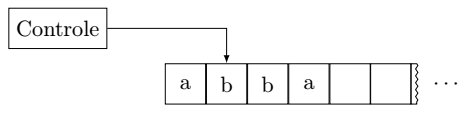

O controle é realizado por um sistema de transição de estados. Nele está descrito o que a máquina deve fazer quando em um determinado estado faz a leitura de um símbolo na fita. 


Assim como para os autômatos finitos, descrevemos as MT por meio de uma representação de círculos, representando estados, ligados por arestas rotuladas, que descrevem os elementos que motivam a transição de estados.

**Figura 2**: Exemplo de diagrama de estados de uma MT.

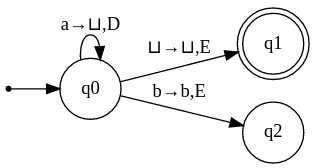

A figura acima representa uma MT com três estados, $q0$, $q1$ e $q2$. O autômato inicia no estado $q0$, indicado por uma seta sem origem em outro estado. Os rótulos das setas indicam os possíveis fatos motivadores de uma mudança de estado.

O rótulo é composto por três elementos

$$\langle\mathtt{leitura}\rangle \rightarrow \langle\mathtt{escrita}\rangle,\langle\mathtt{movimento}\rangle$$

de modo que a transição entre os estados $q0$ e $q1$

$$~\sqcup \rightarrow a,\text{E}~$$

indica que ao ler o símbolo $\sqcup$ no estado $q0$, será escrito o símbolo $a$ nesta posição, a cabeça de fita será movimentada para a posição a esquerda, e o estado interno da máquina será atualizado para $q1$.

A computação ocorre enquanto $\delta$ for definida. Os estados em $F$ indica que a palavra deve ser *aceita*, caso contrário ela deve ser rejeitada *rejeitada*.

As máquinas de Turing são formalmente definidas como segue.

**Definição 1**: Uma máquina de Turing é uma tupla $(Q, \Sigma, \Gamma, \delta, q_0, F)$, onde
1. $Q$ é um conjunto finito de símbolos de estado,
1. $\Sigma$ é um conjunto finito de símbolos de alfabeto, onde $\sqcup \not\in \Sigma$,
1. $\Gamma$ é um conjunto finito de símbolos de fita, onde $\Sigma \cup \{\sqcup\} \subseteq \Gamma$,
1. $\delta : Q' \times \Gamma \rightarrow Q \times \Gamma \times \{\mathrm{D,E}\}$ é a função de transição, onde $Q' \subseteq Q$,
1. $q_0 \in Q$ é o estado inicial,
1. $F \subseteq Q - Q'$ é o conjunto de estados de aceitação.



Podemos definir a MT ilustrada na Figura 2 formalmente como

$$M = (\{q_0,q_1, q_2\}, \{a,b\}, \{a,b,\sqcup\}, \delta, q_0, \{q_1\})$$

onde $\delta(q_0,a)=(q_1,a,D) $, $\delta(q_0,b)=(q_2,b,D)$, $\delta(q_0,\sqcup)=(q_0,a,D)$.

Chamamos de configuração a combinação de estado interno da máquina, conteúdo da fita e posição da cabeça de fita.

Podemos representar textualmente um configuração como uma cadeia $uqv$, onde $q$ é o estado atual da máquina, $uv$ o conteúdo da fita e a cabeça de leitura está sobre o primeiro caractere de $v$.

**Figura 3:** Configuração de uma Máquina de Turing.

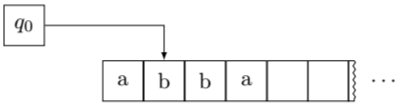

A configuração acima é representada textualmente por $aq_0bba$.


Seja $C_i, C_j$ configurações de $M$, dizemos que $C_i$ **origina** $C_j$ se
- $C_i = q_ibv$, $~C_j = q_jcv~$ e $~\delta(q_i,b) = (q_j,c,\mathrm{E})$, ou
- $C_i = uq_ibv$, $~C_j = ucq_jv~$ e $~\delta(q_i,b) = (q_j,c,\mathrm{D})$, ou
- $C_i = uaq_ibv$, $~C_j = uq_jacv$, $~\delta(q_i,b) = (q_j,c,\mathrm{E})$ e $a \in \Gamma$. 

Os itens acima descrevem formalmente o processo de mudanças de configuração ocasionado pelos movimentos da máquina de Turing, incluindo o caso especial de uma tentativa de movimento à esquerda na posição mais a esquerda da fita.

Seja $M = (Q, \Sigma, \Gamma, \delta, q_0, F)$ uma MT e $w = w_1w_2...w_n$ uma cadeia sobre $\Sigma$, dizemos que $M$ **para** com entrada $w$ se existe uma sequência de configurações $(C_0,C_1,...,C_n)$ tal que
1. $C_0 = q_0w$,
1. $C_{i} \text{ origina } C_{i+1}$,
1. $C_n = uqv \text{ e } q \not\in Q'$.

Se a MT para e $q \in F$ dizemos que $M$ **aceita** $w$. Se a MT para e $q \not\in F$ dizemos que $M$ **rejeita** $w$.

### Implementação em Python

Em nossa implementação, uma máquina de Turing é representada pela classe `MT`, cujo construtor segue a definição apresentada:

`M = MT(Q,Sigma,Gamma,delta,q0,F)`

A seguir temos o exemplo da MT da Figura 2. 

Os elementos `Q`, `Sigma` e `Gamma` são elementos do tipo `set()`. Os elementos `q0`, `q1` e `q2` devem ser elementos de `Q`. A função de transição `delta` é um elemento do tipo `dict()` cuja construção deve ter domínio e contradomínio como indicado na Definição 1.


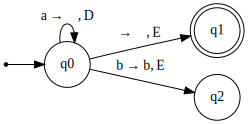

In [2]:
from teocomp.automata import MT

BLK,D,E = MT.default.values()

Q = {'q0','q1','q2'}
Sigma = {'a','b'}
Gamma = {'a','b',' '}
delta = {('q0','a'):('q0',BLK,D),
         ('q0','b'):('q2','b',E),
         ('q0',BLK):('q1',BLK,E)}
q0 = 'q0'
F  = {'q1'}

M = MT(Q,Sigma,Gamma,delta,q0,F)
M

Definida a máquina de Turing `M`, podemos usar a função `M.aceita(entrada)` para verificar a aceitação de cadeias, onde `entrada` deve ser composta por uma sequência de símbolos pertencentes a `Sigma`. A aceitação de uma palavra retornará o valor `True`.

In [3]:
M.aceita("aaaa")

True

A rejeição de uma palavra retornará o valor `False`.

In [4]:
M.aceita("aabb")

False

Você pode também realizar múltiplos testes utilizando listas com casos de teste:

In [5]:
testes = [("a",True), ("aa",True), ("aaa",True), ("",True), ("b",False), ("ab",False), ("aba",False), ("bbb",False)]
[M.aceita(entrada) == saida for entrada, saida in testes]

[True, True, True, True, True, True, True, True]

Não é necessário que os conjuntos `Q`, `Sigma` e `Gamma` sejam do tipo `str`. Podemos assim utilizar algumas funções do Python para facilitar a definição de máquinas de Turing.

 Definimos a seguir, uma MT $M$ que reconhece a linguagem $\{w\#w ~|~ w \in \{a,b\}^*\}$ utilizando alguns recursos da linguagem Python, como a função `range()`.

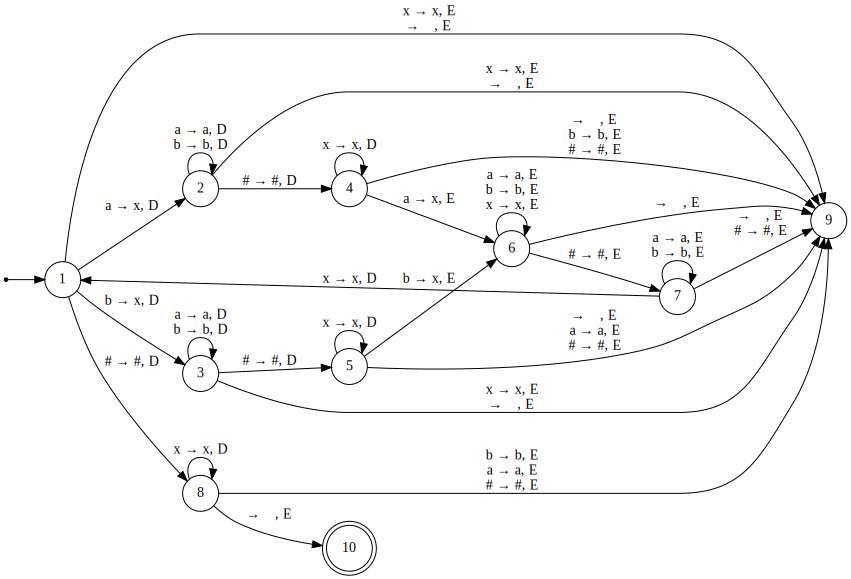

In [6]:
Q = {x for x in range(1,11)}
Sigma = {'a','b','#'}
Gamma = {'a','b','#','x',BLK}
delta = {(1,'a'):(2,'x',D),(1,'b'):(3,'x',D),(6,'a'):(6,'a',E),(7,'x'):(1,'x',D),
         (2,'a'):(2,'a',D),(3,'a'):(3,'a',D),(6,'b'):(6,'b',E),(1,'#'):(8,'#',D),
         (2,'b'):(2,'b',D),(3,'b'):(3,'b',D),(6,'x'):(6,'x',E),(8,'x'):(8,'x',D),
         (2,'#'):(4,'#',D),(3,'#'):(5,'#',D),(6,'#'):(7,'#',E),(8,BLK):(10,BLK,E),
         (4,'x'):(4,'x',D),(5,'x'):(5,'x',D),(7,'a'):(7,'a',E),
         (4,'a'):(6,'x',E),(5,'b'):(6,'x',E),(7,'b'):(7,'b',E)}
delta.update({(q,a):(9,a,E) for a in Gamma for q in (Q - {9,10}) if (q,a) not in delta})
q0 = 1
F = {10}

M = MT(Q,Sigma,Gamma,delta,q0,F)
M

Como antes, podemos realizar múltiplos testes usando listas de casos. A seguir, o conjunto `A` contém cadeias que devem ser aceitas por $M$ e `R` cadeias que devem ser rejeitadas.

In [7]:
A = ["aa#aa","bb#bb","ab#ab","bab#bab","#"]
R = ["a#aa","bb#b","aa#bb","bab#baa","###"]

print([M.aceita(w) for w in A])
print([M.aceita(w) for w in R])

[True, True, True, True, True]
[False, False, False, False, False]


Podemos ainda acompanhar visualmente a computação utilizando o método `interactive`.

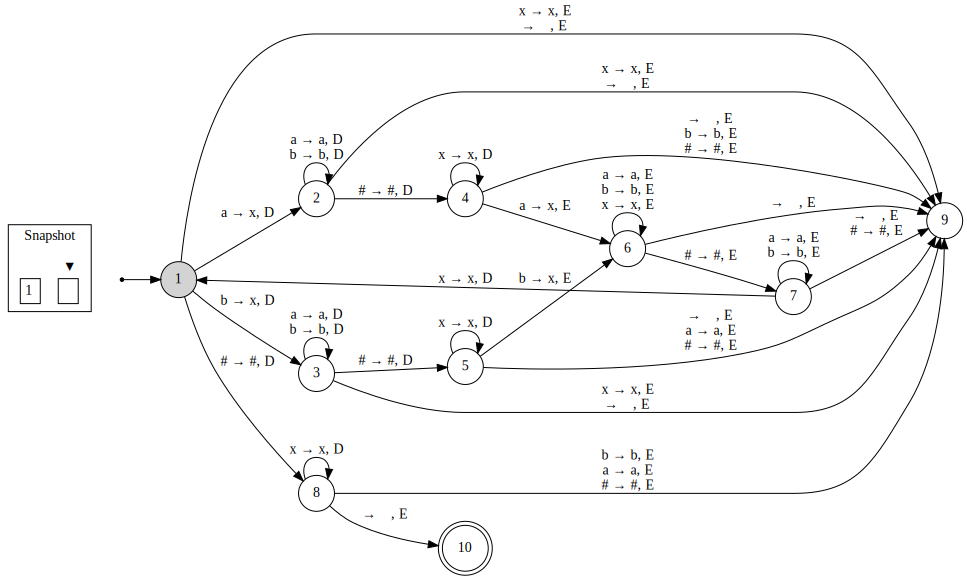

In [8]:
from teocomp.utils import view

view.interactive(M)

### Máquinas de Turing como funções

Podemos construír Máquinas de Turing para além de suas capacidade de reconhecer linguagens, considerando além da sua indicação de aceitação ou rejeição, qual conteúdo da fita ao término da computação.

Considere por exemplo a máquina que reconhece a linguagem $\{u\#v ~|~ w \in \{1\}^*\}$ e que, quando aceita, deixa escrito na fita a cadeia $uv$. Em outro sentido, o que a máquina faz é calcular a soma de dois números $u$ e $v$ representados de forma unária.

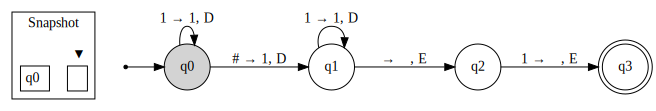

In [9]:
BLK,D,E = MT.default.values()

Q     = {'q0','q1','q2','q3'}
Sigma = {'1','#'}
Gamma = {'1','#', BLK}
delta = {('q0','1'):('q0','1',D), ('q0','#'):('q1','1',D), 
         ('q1','1'):('q1','1',D), ('q1',BLK):('q2',BLK,E), 
         ('q2','1'):('q3',BLK,E)}
q0 = 'q0'
F = {'q3'}

SOMA = MT(Q,Sigma,Gamma,delta,q0,F)
view.interactive(SOMA)

 ### Máquinas de Turing como subrotinas

Máquinas de Turing podem ser usadas como subrotinas para definir máquinas mais complexas. Suponha por exemplo que desejamos criar uma máquina que ao somar números unários, também retorna a cabeça de leitura para a posição inicial.

Podemos criar uma máquina de Turing `INICIO` que retorna a cabeça de leitura para a posição inicial e "acoplá-la" a máquina `SOMA` definida anteriormente.

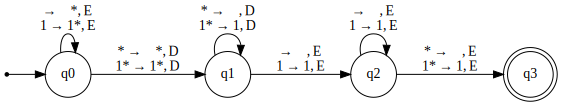

In [10]:
BLK,D,E = MT.default.values()   

Sigma = {'1'}

marca    = {a:a+'*' for a in (Sigma | {BLK})} 
desmarca = {a+'*':a for a in (Sigma | {BLK})}

Q = {'q0','q1','q2','q3'}
Gamma = Sigma | {BLK} | {a for a in desmarca}
delta = {}
delta = delta | {('q0',a):('q0',marca[a],E) for a in marca}
delta = delta | {('q0',a):('q1',a,D) for a in desmarca}
delta = delta | {('q1',a):('q1',desmarca[a],D) for a in desmarca}
delta = delta | {('q1',a):('q2',a,E) for a in marca}
delta = delta | {('q2',a):('q2',a,E) for a in marca}
delta = delta | {('q2',a):('q3',desmarca[a],E) for a in desmarca}
q0 = 'q0'
F = {'q3'}

INICIO = MT(Q,Sigma,Gamma,delta,q0,F)
INICIO

A composição de máquinas de Turing pode ser realizada por meio do método `where` onde são indicados os estados da máquina que na verdade representam abstrações de comportamentos definidos por outras máquinas de Turing.

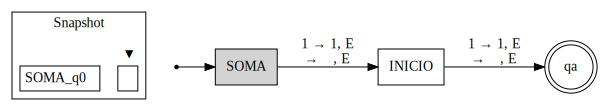

In [11]:
BLK,D,E = MT.default.values()

Q     = {'SOMA','INICIO','qa'}
Sigma = {'1','#'}
Gamma = {'1','#', BLK}
delta = {('SOMA','1'):('INICIO','1',E),('SOMA',BLK):('INICIO',BLK,E),
         ('INICIO','1'):('qa','1',E),('INICIO',BLK):('qa',BLK,E)}
q0 = 'SOMA'
F = {'qa'}

SOMA_INICIO = MT(Q,Sigma,Gamma,delta,q0,F).where({'SOMA':SOMA,'INICIO':INICIO})
view.interactive(SOMA_INICIO)